In [105]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
plt.rcParams["font.size"] = "20"
df = pd.read_csv('./AppleStore.csv')
df.head(6)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,0


In [106]:
df.shape

(11100, 17)

**CRISP-DM (Cross Industry Standard Process for Data Mining)**<br/>
***Business Understanding:***
Now a days people spend alot of time using their smart phones and tablets. 80% of this time is spent on mobile apps. These apps vary widely from being simple entertainment apps like games to more sophisticated apps that help the users accomplish thier buisiness easily and effectively like finance apps.
For corporates mobile apps are so much important to their business environment. No matter what is the business, a mobile app can help corporates get and retain customers. 
This grawing interest in mobile applications made it a thriving market, with more apps made available for users every day. This made it challenging for developers to choose the right app. Developers need to find:
- What types of apps have greater users' demand?
- How to pick app category based on users ratings?
- Should the app be free or paid? 
- What app features contribute more in users satisfaction hence higher user rating?
- What is the expected users rating for thier new mobile application?

***Data Understanding:***
To be able to answer those questions and similar questions, the Mobile App store dataset is used. This data set contains 11100 Apple iOS mobile application details. The data was extracted from the iTunes Search API at the Apple Inc website. This dataset became a valuable dataset for developers who want to make trending apps for the ios app store. It helps better understand the users of the iPhone and iPad; their needs and preferences regarding their prefered apps.

The main fields in this dataset are:
- id: a unique id for each application
- track_name: Mobile application name
- size_bytes: Size of the application in bytes
- currency: The currency to pay for the mobile incase its priced
- price: price of the app 
- rating_count_tot: total number of reviews the app received for all versions
- rating_count_ver: total number of reviews received for the latest version of the app
- user_rating: the average user ratings for the app
- user_rating_ver: the average user rating value for the currence version of the app
- ver: latest version code
- cont_rating: app content rating based on the target users age
- prime_genre: app prime_genre
- sup_devices.num: Number of supporting devices
- ipadSc_urls.num: Number of screen shots shared for display
- lang.num: Number of supported languages enabled
- vpp_lic: Vpp Device Based Licensing Enabled
- game_enab: game enabled

In [107]:
df.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
count,1.110000e+04,1.110000e+04,11100.000000,1.110000e+04,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.0
mean,9.196595e+08,1.291145e+08,1.119242,8.359482e+03,298.496486,2.286802,2.109550,24.576216,2.755225,3.875495,0.643874,0.0
std,2.575416e+08,3.044624e+08,4.768515,6.129530e+04,3164.394530,2.080899,2.129825,17.621606,2.056240,6.719282,0.478875,0.0
min,2.816565e+08,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,7.748118e+08,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0
50%,1.041344e+09,4.249093e+07,0.000000,2.000000e+01,1.000000,3.000000,2.000000,37.000000,2.000000,1.000000,1.000000,0.0
75%,1.106219e+09,1.246930e+08,0.990000,8.192500e+02,54.000000,4.500000,4.500000,38.000000,5.000000,2.000000,1.000000,0.0
max,1.188524e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000,0.0


From the description of the Apple Store dataset, many facts can be seen, for example the user ratings vary from [0 - 5], higher rating indicates higher user's satisfaction. It can also be seen that 50% of the apps received a rating of 3. The average rating for all apps in the sample dataset is around 2.29.
<br><br>
Another thing that can be noticed: most of the apps are free, and most of the paid apps are avilable for around 1 USD with the highest priced app is for 299.99 USD. So, one should be careful before pricing his app.
<br><br>
Besides the price or how to make money frome the app, the developer of the mobile app should think about the number of the supported devices and languages at a very early stage of the development process. In the sample dataset, Most of the applications support around 24 devices and approximatly 4 different languages. 

**What types of apps have greater users' demand?**<br>
The total number of applications in the sample dataset is 11100. To see how this number is distributed among application categories or prime genres the seaborn library countplot() function can be used:

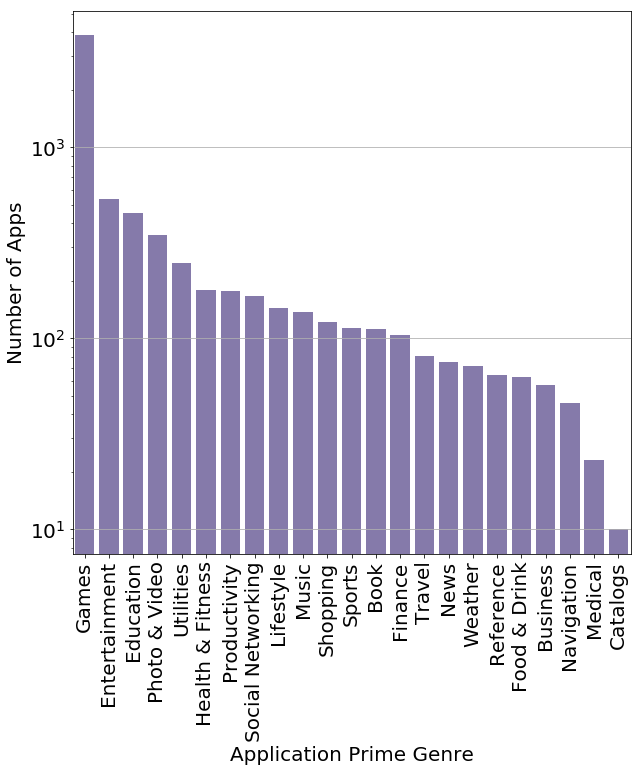

In [108]:
fig = plt.figure(figsize=[10,10],facecolor=(1,1,1))
sns.countplot(data= df, x='prime_genre', order=df['prime_genre'].value_counts().index, color=sns.color_palette()[3])
plt.xticks(rotation=90)
plt.yscale(value='log') #use logarithmic scale
plt.grid(b=True,axis="y")
plt.xlabel("Application Prime Genre")
plt.ylabel("Number of Apps")
plt.show()

Note that in the above plot, logarithmic scale is used. From the plot it can be seen that the biggest number of apps in the sample set are Games. Then comes the Entertainment apps, followed by Education apps, Photo & Video apps. The bigger number of apps in these genres indicates that there is a higher demand on these prime genres.  On the other hand, there are much fewer apps in the Business, Navigation, Medical and Catalog genres. So if a developer is looking for fewer competitors, he can try to find app ideas under these categories.
<br><br>
To get more insight about these app genres, we can plot the size distribution under each category of apps. The expected size of the app can give idea about the development time need for a specific app category. Also, we need to check if the size affect the users' satisfaction, is there a preference for smaller apps by the users?<br>
seaborn scatter plot is used in the following two plots to display these relations.

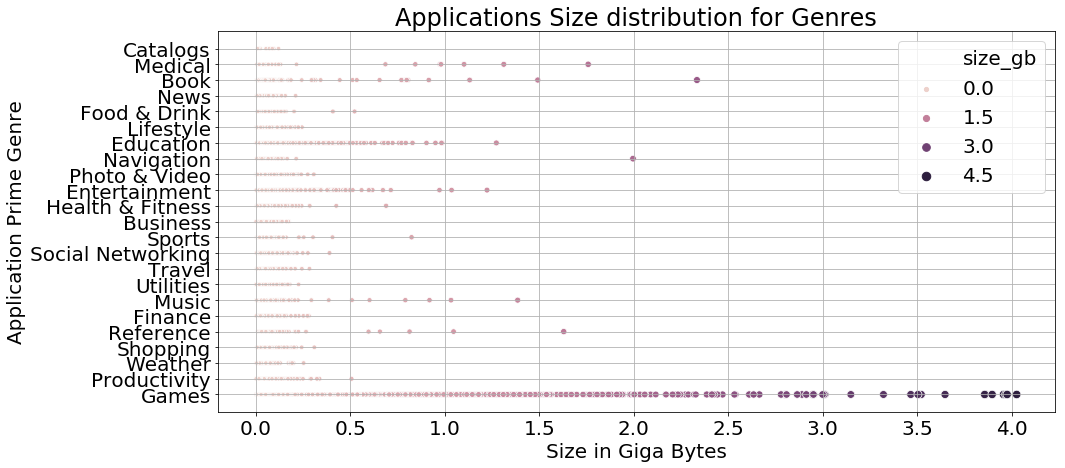

In [109]:
df_size = df.copy()
#add a column containing the size of app in giga bytes for better display of the data
df_size['size_gb'] = df['size_bytes']/(1e+9) 

plt.figure(figsize=[15,7], facecolor=(1,1,1))
sns.scatterplot(data=df_size, y="prime_genre", x="size_gb", size="size_gb",hue="size_gb",color=sns.color_palette()[4])
plt.grid(b=True)
plt.xlabel('Size in Giga Bytes')
plt.ylabel('Application Prime Genre')
plt.title('Applications Size distribution for Genres')
plt.show()

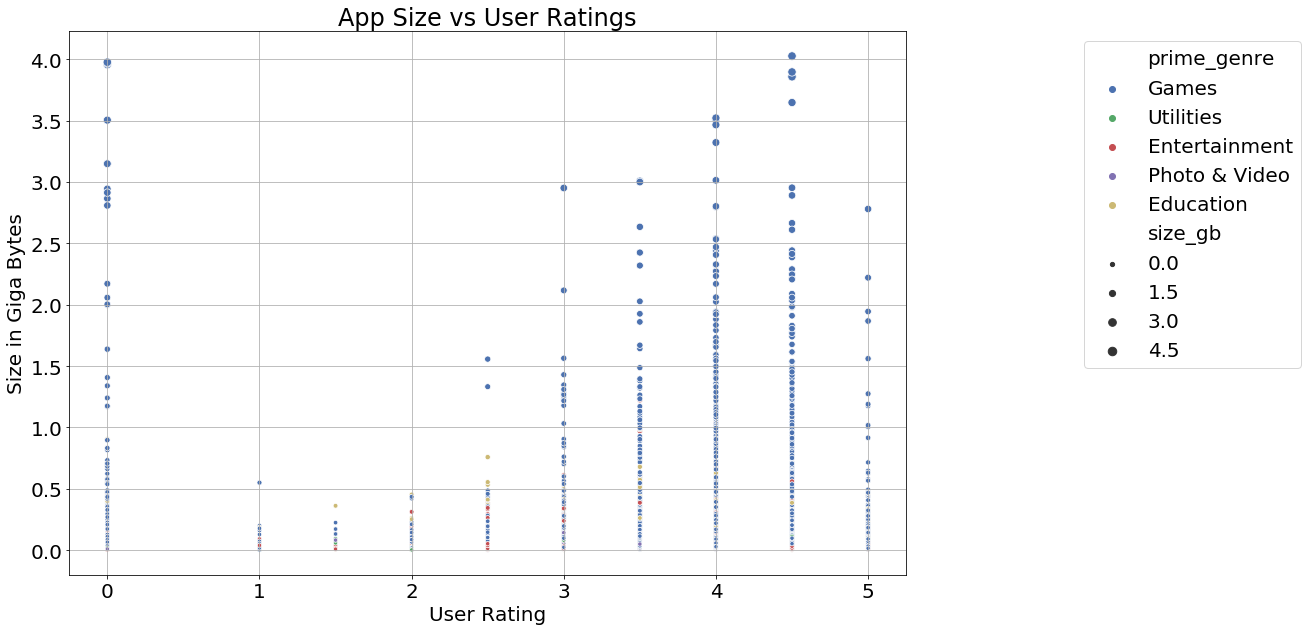

In [110]:
#Copy categories 'genres' of highest demand
df_categories = df_size[df_size['prime_genre'].isin(['Games','Education','Entertainment','Photo & Video','Utilities']) ]
plt.figure(figsize=[15,10], facecolor=(1,1,1))
sns.scatterplot(data=df_categories, y="size_gb", x="user_rating",hue="prime_genre",size='size_gb',s=100)

plt.grid(b=True)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.ylabel('Size in Giga Bytes')
plt.xlabel('User Rating')
plt.title("App Size vs User Ratings")
plt.show()

From the previous plots it can be seen that the Games apps have the biggest sizes, followed by the Books apps and the Education apps. For most of the app genres, the size is less than 500 Mega Bytes. From the second plot of size vs user ratings, It can be seen that the app size does not affect the user ratings. Hence, when a developer pick app genre he should pay attention to the size to be with in range with other apps under this genre.

**How to pick app category based on users ratings?**<br>
To display the relationship between app prime genre and user ratings, seaborn boxplot() function is used:

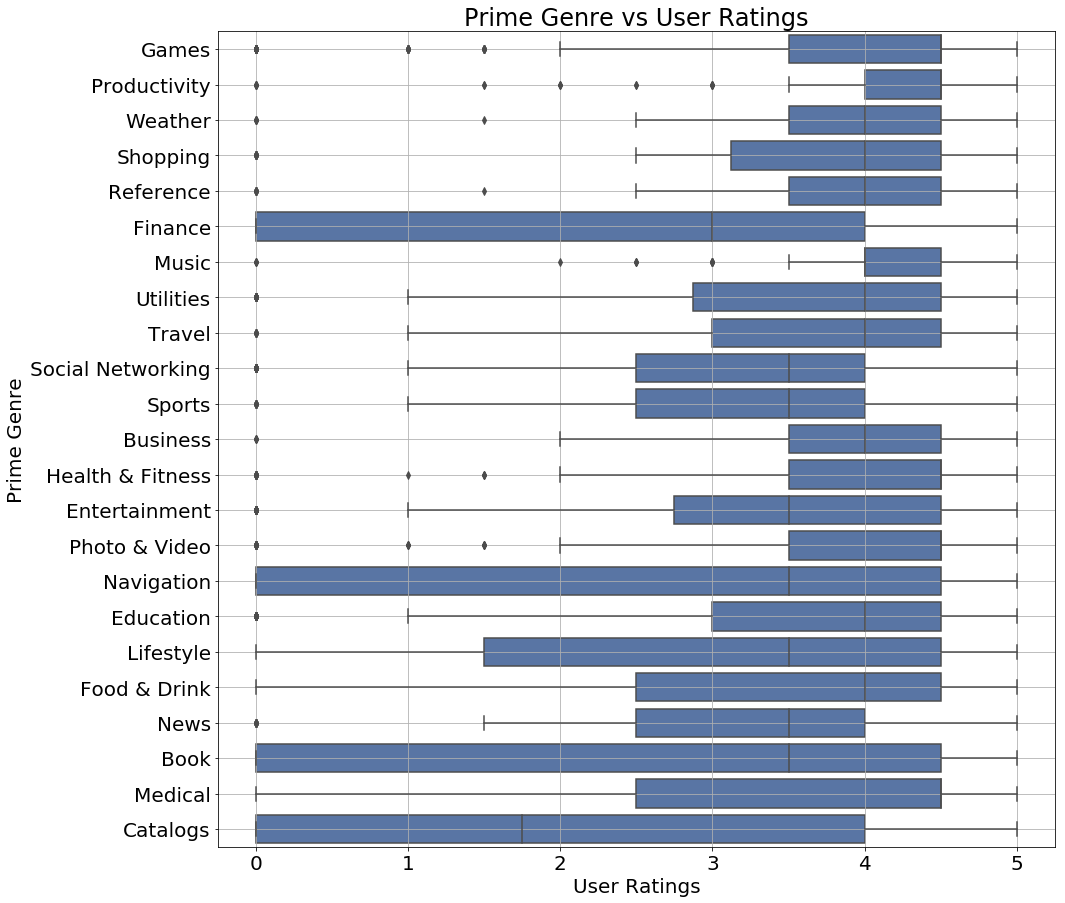

In [111]:
plt.figure(figsize=[15,15], facecolor=(1,1,1))
sns.boxplot(data = df, y = 'prime_genre', x = 'user_rating', color = sns.color_palette()[0])
plt.grid(b=True)
plt.xlabel('User Ratings')
plt.ylabel('Prime Genre')
plt.title('Prime Genre vs User Ratings')
plt.show()

From the above box plot it can be seen that some app genres tend to have higher user ratings than others, for example, Productivity, Games and Music apps generally have high user ratings. On the other hand, Catalogs, Books, Lifestyle, Finance and Navigation apps Have a wide range of ratings with many below the average rating for all apps with many received a rating below 3. So the users demands in these categories seem to be more difficult to satisfy. 

A look on the content rating gives more insight about the type of users and their demands for a successful app. First the seaborn countplot() function is used to display the number of apps in the sample dataset under each content rating:

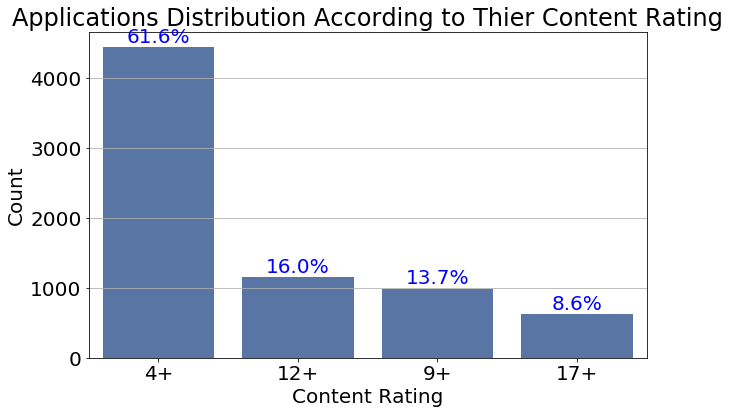

In [112]:
plt.figure(figsize=[10,6], facecolor=(1,1,1))

Num_apps = df.shape[0] - df['cont_rating'].isnull().sum()
cont_val_count = df['cont_rating'].value_counts()
cont_val_count * 100/ Num_apps

sns.countplot(data= df, x='cont_rating', order=df['cont_rating'].value_counts().index, color=sns.color_palette()[0])

#Display the percentage
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cont_val_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/Num_apps)

    # print the annotation just below the top of the bar
    plt.text(loc, count+70, pct_string, ha = 'center', color = 'b')

plt.grid(b=True, which='major', axis="y")
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Applications Distribution According to Thier Content Rating')
plt.show()

From the above figure it can be seen that 61.6% of the apps are targeting (4+) users, and only 8.6% of the apps are targeting older users (17+). To see how those categories of users rated the apps, seaborn boxplot() function was used to display the relation between the users content rating (ages of users) and the user ratings for the apps:

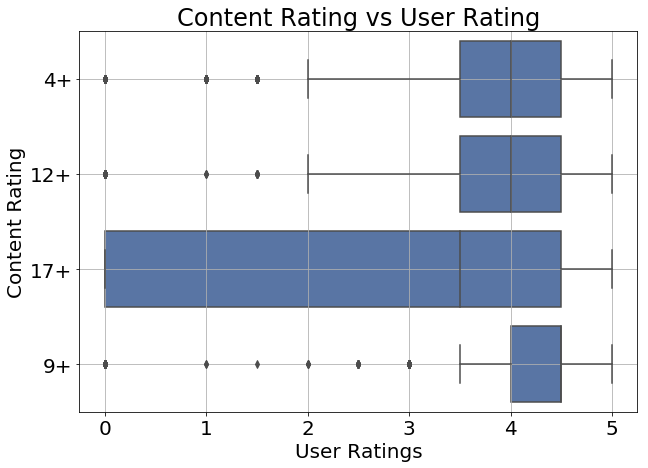

In [113]:
plt.figure(figsize=[10,7], facecolor=(1,1,1))
sns.boxplot(data = df, y ='cont_rating', x = 'user_rating', color = sns.color_palette()[0])
plt.grid(b=True)
plt.ylabel('Content Rating')
plt.xlabel('User Ratings')
plt.title('Content Rating vs User Rating')
plt.show()

From the above box plot it can be seen that the users of lower ages tend to give higher ratings for the apps, compared to older users who seem to have more demands to give a high ratings. The (9+) users gave a rating that is mostly above 4. This conclusion seems inline with the conclusion from the 'Prime Genre vs User Ratings', since the categories that received a wide range of ratings [Catalogs, Books, Lifestyle, Finance, Navigation] normally used by older users above 17 years. 

From the previous analysis it can be concluded that:<br>
1- targeting older users is more challenging.<br>
2- Some app genre tends to have higher rating which means the users demands are easier to satify for their categories. <br>
A developer can choose one of the categories [Productivity,Games, Music] and target (9+) users for his next trendy app.

**Should the app be free or paid?**<br>
To be able to answer this question, first we need to find out the percentage of free apps to paid apps under each genre. matplotlib bar() function is used in the code below to display this relation: 

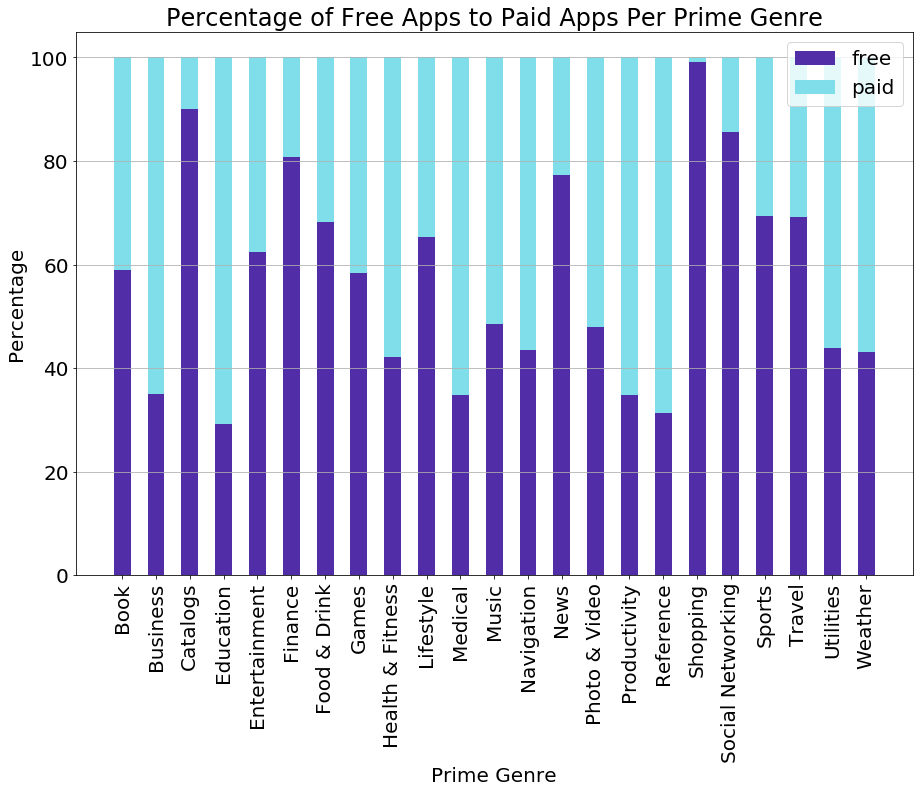

In [114]:
df_price = df.copy()
#add a paid column which display 'paid' when add is priced and 'free' when price = 0
df_price['paid'] = df['price'].apply(lambda x: 'paid' if x>0 else 'free')
#create a dataframe containg the app genre, paid column and the count of each 
df_paid = df_price.groupby(['prime_genre','paid']).count()[['price']]
df_paid = df_paid.unstack(1)
df_paid = df_paid['price'].reset_index()

#add a column 'percent_free' containg the percentage of free apps to all apps in the category 
df_paid['percent_free'] = df_paid['free']*100/(df_paid['paid']+df_paid['free'])
#add a column 'percent_paid' containg the percentage of free apps to all apps in the category
df_paid['percent_paid'] = df_paid['paid']*100/(df_paid['paid']+df_paid['free'])

plt.figure(figsize=[15,10])

plt_free = plt.bar(df_paid['prime_genre'],df_paid['percent_free'],width=0.5,color='#512da8')
plt_paid = plt.bar(df_paid['prime_genre'],df_paid['percent_paid'],width=0.5, bottom=df_paid['percent_free'] ,color='#80deea')
plt.legend((plt_free,plt_paid),('free','paid'))
plt.xticks(rotation=90)
plt.grid(b=True,axis='y')
plt.xlabel('Prime Genre')
plt.ylabel('Percentage')
plt.title('Percentage of Free Apps to Paid Apps Per Prime Genre')
plt.show()

From the plot it can be noticed that generally there are more free apps than paid apps under each category. With the exception of some genres like the Business, Education and Reference apps. <br>
But how this affect the user rating? The plot below, displays the value for the average user rating for free and paid apps under each category:

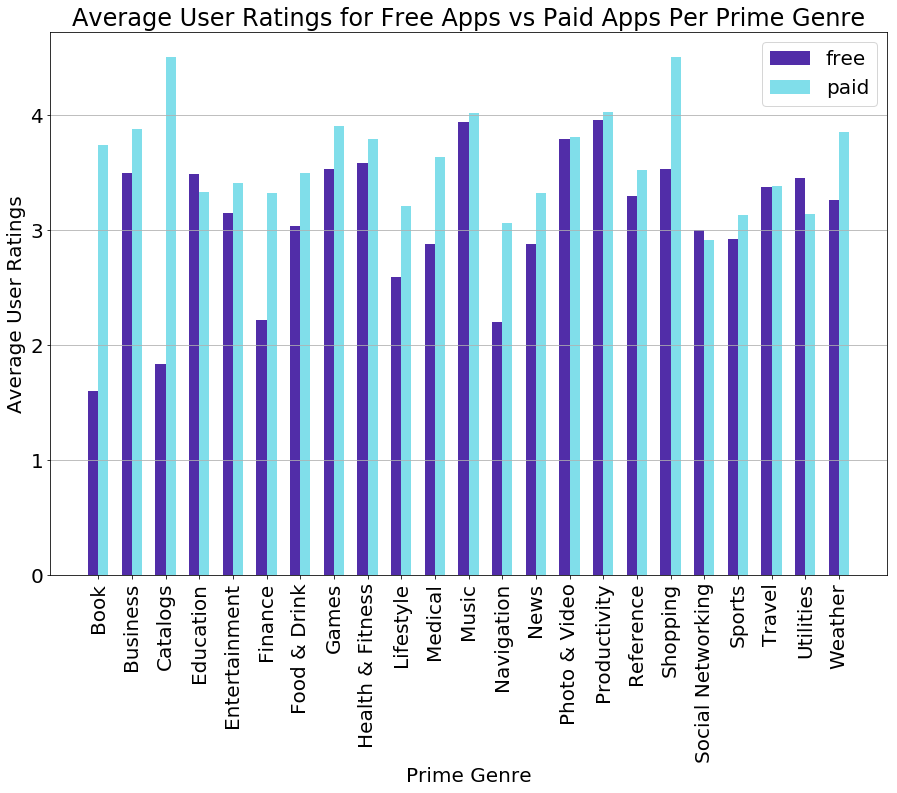

In [115]:
df_rating = df.copy()
#add a paid column which display 'paid' when add is priced and 'free' when price = 0
df_rating['paid'] = df['price'].apply(lambda x: 'paid' if x>0 else 'free')
#create a dataframe containg the app genre, paid column and the average user rating for each 
df_rating = df_price.groupby(['prime_genre','paid']).mean()[['user_rating']]
df_rating = df_rating['user_rating']
df_rating = df_rating.unstack(1)
df_rating = df_rating.reset_index()

plt.figure(figsize=[15,10])
ax = plt.subplot()
x = np.arange(23)
plt_free = plt.bar(x,df_rating['free'],width=0.3,color='#512da8')
plt_paid = plt.bar(x+.3,df_rating['paid'],width=0.3,color='#80deea')
plt.legend((plt_free,plt_paid),('free','paid'))
plt.xticks(x+0.15,df_rating['prime_genre'],rotation=90)
plt.grid(b=True,axis='y')
plt.xlabel('Prime Genre')
plt.ylabel('Average User Ratings')
plt.title('Average User Ratings for Free Apps vs Paid Apps Per Prime Genre')
plt.show()

From the plot it can be clearly seen, that average rating is higher for the priced app than the free apps. Maybe the reason for this is that users mostly do not buy apps unless they are certain they will like them. With the exception of some app genres like Books and Catalogs, for most apps the ratings for the free and paid apps are pretty close. <br>
If a developer decides on making a paid app, it might be useful to look at the price distribution for the apps. For this purpose seaborn scatterplot() function is used to display the price vs the user ratings:

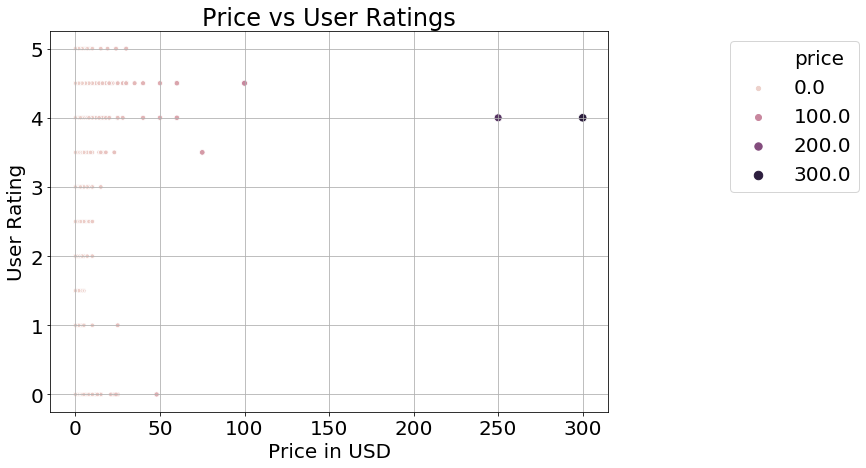

In [116]:
plt.figure(figsize=[10,7])
g = sns.scatterplot(x="price", y="user_rating",size="price", hue="price", data=df)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.grid(b=True)
plt.xlabel('Price in USD')
plt.ylabel('User Rating')

plt.title('Price vs User Ratings')
plt.show()

From the plot it can be seen that most paid apps ate below 30 dollars with high percentage of apps around 1 dollar. So, if a developer want to make a paid app it should be available for users for a very low price. It can also, be noticed that the most pricy apps are for the price of 100 USD, 250 USD and 300 USD got a high average rating. So, a developer can not put a high price on his app unless he makes sure the app provide equivelent value to the user.

**What app features contribute more in users satisfaction hence higher user rating?**<br>
In order to find the effect of the features on the user ratings, seaborn heatmap() function is used to display the correlation between the quantitative features of the app.

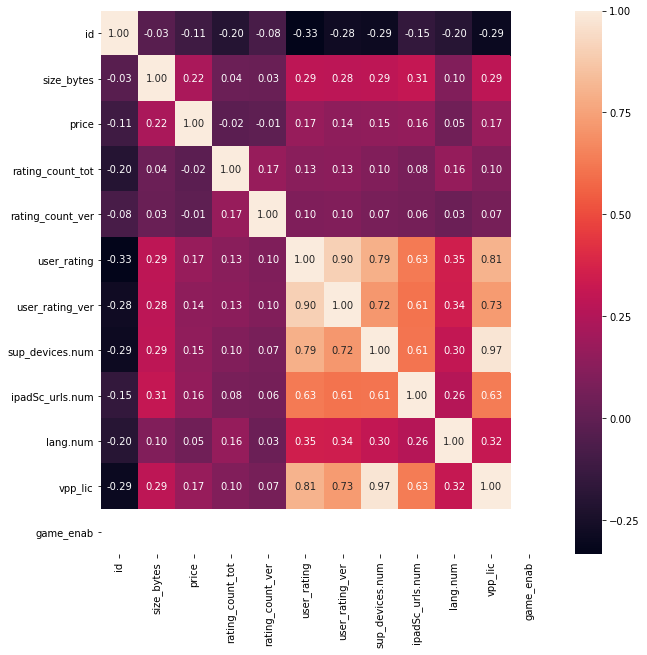

In [117]:
plt.figure(figsize=[10,10])
plt.rcParams["font.size"] = "10"
sns.heatmap(df.corr(), annot=True, fmt=".2f");

From the heat map it can be seen that the features that are highly correlated with the user_rating are:<br>
1- user rating version: which is expected that the rating is close to the rating of the last version<br>
2- The number of supported devices.<br>
3- The number of screen shots shared for display<br>
4- Vpp Device Based Licensing Enabled<br>
So an App developer needs to support as many devices as possible, share at least 5 screen shots which is the max number in the sample dataset. And Enable the Vpp Device Based Licensing for easy distribution of app.

***Preparing the Data:***<br>
If a developer has a new app idea and want to publish it on the App Store, he would like to predict how good his new app can do, in other words, what the user rating will be even before starting in the development process? to answer his question, Linear regression model can be developed and trained using the dataset in our hands, but first the data in the dataset should be prepared for the model.<br> Linear regression model doesn't accept null values in the dataset, Categorical columns should be expanded to multiple boolean columns, one for each category in each categorical column, moreover, any columns with no useful information for training should be dropped from the dataset.<br> 

The first step in preparing the data for modeling is to drop the currency column since all the data in this field reads USD, and drop the track_name column since the id column is enough to identify each app.

In [118]:
# Delete the track_name and currency columns
df.drop(['track_name','currency'],axis=1,inplace=True)
df.head()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,281656475,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0
1,281796108,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
2,281940292,100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0
3,282614216,128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,282935706,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0


Now we need to check if there are null values and in which columns.

In [119]:
# find the columns that has null values
df.isnull().sum()

id                     0
size_bytes             0
price                  0
rating_count_tot       0
rating_count_ver       0
user_rating            0
user_rating_ver        0
ver                 3903
cont_rating         3903
prime_genre         3903
sup_devices.num        0
ipadSc_urls.num        0
lang.num               0
vpp_lic                0
game_enab              0
dtype: int64

There are three fields in the sample dataset that contains nulls: [ver,cont_rating,prime_genre] <br>

It will be convenient to fill the null values in the version "ver" column with the corresponding value from the "user_rating_ver", which is the last version the users rated. This is considered a very good and convenient guess. 

In [120]:
#foreach row if ver value is null fill it with the corresponding value in the user_rating_ver column 
df['ver'] = df.apply(lambda x: x['user_rating_ver'] if pd.isna(x['ver']) else x['ver'], axis=1)

The cont_rating and the prime_genre collumns are categorical so we can impute the missing values with the code of the column 

In [121]:
#find the mode for the cont_rating column
cont_rating_mode = df['cont_rating'].mode().any()
#find the mode for the prime_genre column
prime_genre_mode = df['prime_genre'].mode().any()

In [122]:
#foreach row if the the count_rating is null fill it with the mode
df['cont_rating'].fillna(cont_rating_mode,inplace=True)
#foreach row if the the prime_genre is null fill it with the mode
df['prime_genre'].fillna(prime_genre_mode,inplace=True)

In [123]:
#Make sure no more null values exist in the dataset
df.isnull().sum()

id                  0
size_bytes          0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
game_enab           0
dtype: int64

The ver field and the user_rating_ver field are of object type, the 'ver' in the format "major.minor.patch" and the 'user_rating_ver' in the format of "major.minor"; this format can not be used in the regression model. The ver field should be divided into 3 columns [ver_major, ver_minor, ver_batch] and the 'user_rating_ver' should be divided into two columns [user_rating_ver_major,user_rating_ver_minor]. Then the original "ver" and "user_rating_ver" columns should be dropped.

In [124]:

def parse_version(item,length):
    """Convert version to the format major.minor.patch 

    Args:
    item: string. The version in any format. 
    length: int. if length = 3 returns the version in the major.minor.patch, if length = 2 returns 
            version in the major.minor format

    Returns:
    parse_version: string. The new parsed version string in the requested format.
    """
    try:
        str_item = str(item).replace(',','.').rstrip('.')
        str_item =re.sub("[^0-9]", ".", str_item) 
        x = [int(s)  for s in str_item.split('.') if s.isnumeric()]
        index = length 
        while(len(x) > length):
            x.pop(index)
            index = index - 1
        while(len(x) < length) :
            x.append(0)
        if(len(x) != length):
            print(x)
        return x
    except:
        print(item)

#parse the ver column to the required format
result = df['ver'].apply(parse_version,length=3)
#create a new dataframe splitting the ver column to three new columns 'ver_major','ver_minor','ver_patch'
df_result = pd.DataFrame(list(result), columns=['ver_major','ver_minor','ver_patch'])
#drop the original ver column and replace it with the three new columns 'ver_major','ver_minor','ver_patch'
df_final = pd.concat([df.reset_index(drop=True), df_result.reset_index(drop=True)], axis=1)


In [125]:
df_final.drop("ver",axis=1,inplace=True)
df_final.head()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab,ver_major,ver_minor,ver_patch
0,281656475,100788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1,0,6,3,5
1,281796108,158578688,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1,0,8,2,2
2,281940292,100524032,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1,0,5,0,0
3,282614216,128512000,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1,0,5,10,0
4,282935706,92774400,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1,0,7,5,1


In [126]:
#parse the user_rating_ver column to the required format
result_2 = df['user_rating_ver'].apply(parse_version,length=2)
#create a new dataframe splitting the user_rating_ver column to two new columns 'user_rating_ver_major','user_rating_ver_minor'
df_result_2 = pd.DataFrame(list(result_2), columns=['user_rating_ver_major','user_rating_ver_minor'])
#drop the original user_rating_ver column and replace it with the new columns 'user_rating_ver_major','user_rating_ver_minor'
df_final_2 = pd.concat([df_final.reset_index(drop=True), df_result_2.reset_index(drop=True)], axis=1)

In [127]:
df_final_2.drop("user_rating_ver",axis=1,inplace=True)
df_final_2.isnull().sum()

id                       0
size_bytes               0
price                    0
rating_count_tot         0
rating_count_ver         0
user_rating              0
cont_rating              0
prime_genre              0
sup_devices.num          0
ipadSc_urls.num          0
lang.num                 0
vpp_lic                  0
game_enab                0
ver_major                0
ver_minor                0
ver_patch                0
user_rating_ver_major    0
user_rating_ver_minor    0
dtype: int64

The ["cont_rating", 'prime_genre'] are categorical columns so they should be dropped and replace by dummy columns each correspoding to a value in those columns:

In [128]:
def create_dummy_df(df, cat_cols, dummy_na):
    """Create Dummy columns from category columns, for each category value a new column is added. 
    if the value of the column in the row equals this category the new column value is 1, else it is 0.   

    Args:
    df: DataFrame. The dataframe to create the dummy columns for. 
    cat_cols: list(string)). A list of the names of the category columns.

    Returns:
    df: the dataframe after dropping the category columns and replacing it with the dummy columns.
    """
    for col in cat_cols:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
    return df

In [129]:
cat_cols = ["cont_rating", 'prime_genre']
df_dummy = create_dummy_df(df_final_2,cat_cols=cat_cols,dummy_na=False)

***Data Modeling:***

Now its time to develop the The Linear Regression learning algorithm that can be used to predict the user rating based on the application details. The features data frame X and y which contains the user ratings are split into training set and test set.  

In [130]:
#The features dataset
X = df_dummy.drop('user_rating', axis=1)
#The output 
y = df_dummy['user_rating']

In [131]:
#split the data into training dataset and testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state=42)
#create the linear regression model
lm_model = LinearRegression(normalize=True)
#train the model using the training dataset
lm_model.fit(X_train, y_train)
#predict the output using the test dataset
y_test_preds = lm_model.predict(X_test)
#predit the output using the train dataset
y_train_preds =lm_model.predict(X_train)



***Evaluate the Results:***<br>
To evaluate the model the r2 scores for the training data and the test data are evaluted.

In [132]:
#compute the r2 score for the train dataset
train_score = r2_score(y_train,y_train_preds)
train_score

0.8673360167780101

In [133]:
#compute the r2 score for the test dataset
test_score = r2_score(y_test,y_test_preds)
test_score

0.8664556685104955

The train score is approximatly 0.867 and the test score is 0.866 which is a very good score. Our model is doing a very good job in predicting the user rating and can be used for this purpose. <br>It is expected that the model may be more accurate if more data were collected or more app features presented in the dataset such as the number of app downloads.